In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000, n_features=2, n_targets=1,noise=3.0)

In [3]:
X

array([[ 0.79492447, -1.1496961 ],
       [-0.27718733,  2.4259064 ],
       [ 0.1372231 , -0.03581239],
       ...,
       [ 0.4727872 , -0.30021253],
       [ 0.50334849,  0.84347831],
       [ 1.60817313,  0.77637066]])

In [4]:
y

array([-2.84487579e+01,  1.12839728e+02,  7.02107162e+00, -4.77180184e+01,
       -3.60381641e+01, -5.86234685e+01,  7.49415831e+01, -3.05994772e+01,
       -2.96216305e+01, -9.59257464e+01, -9.93152887e+00,  5.39455665e+00,
        5.89043357e+01,  7.79068241e+01, -6.39252435e+01, -6.27548519e+00,
       -1.60809101e+01, -1.18729562e+02,  7.50760132e+01,  9.59310919e+01,
        6.87042174e+01, -6.37047436e+01,  1.86518972e+01,  3.47281060e+01,
        1.64657209e+00, -7.41517018e+01, -6.53789188e+01,  5.31184500e+01,
        3.71170973e+01,  8.64417563e+01, -3.23062901e+00,  5.88972472e+01,
       -1.84580719e+01, -5.89438967e+01, -1.71017970e+01,  4.25810606e+01,
       -7.38765368e+01, -3.86180997e+01, -3.64968190e+01,  1.65075778e+01,
        9.51178561e+01, -5.34815143e+01, -6.35680356e+01,  6.23677102e+01,
       -6.72385444e+01,  5.51311120e+01, -6.42985683e+01,  9.89088835e+01,
       -2.42747217e+01,  7.49861524e+01,  3.65623656e+01,  5.64283428e+01,
       -6.92112539e+01,  

<Axes: xlabel='0', ylabel='1'>

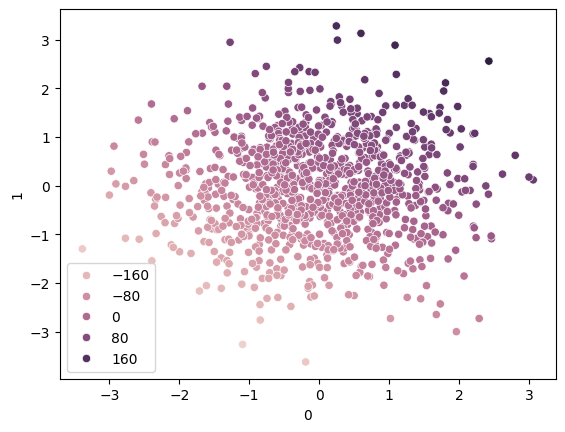

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1)

In [8]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [12]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [13]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[37.33093826, 50.30118892]])

In [15]:
y_pred=svr.predict(X_test)

In [16]:
y_pred

array([ 2.90287033e+01,  2.62941827e+01, -8.40529209e+01, -4.37688721e+01,
        6.94559582e+00,  4.75905557e+00,  3.99413044e+01,  9.63833911e+01,
        3.41168409e+01,  7.13721184e+01,  6.08287167e+01,  1.12362848e+01,
       -1.07945222e+01, -3.19917551e+01, -7.07177234e+01, -5.52109245e+01,
       -5.67523412e+01,  7.38843573e+01,  4.33110786e+01, -2.85805765e+01,
       -5.79262602e+00,  2.61387916e+01, -1.16090628e+02, -3.30645212e+01,
       -1.26112152e+02,  8.98700509e+01,  1.90255864e+01, -7.61616446e+01,
        8.41411356e+01, -3.66947867e+01, -1.25587135e+01,  4.18980525e+01,
       -7.40978498e+00, -7.31182442e+01,  7.19137280e+00,  9.95947649e+00,
        7.68686433e+01, -1.30209402e+01, -3.92023488e+01, -2.87180462e+01,
        1.39168744e+02, -2.17214961e+01, -7.80504114e+01, -8.78393148e+00,
       -2.27741432e+01,  1.10834524e+02, -6.19129568e+01, -5.44982975e+01,
        2.86101816e+00,  3.19091618e+01, -3.27265987e+01, -1.83432253e+01,
       -1.75037901e+01,  

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9978895425540062

In [18]:
# hyperparameter tuning with svc

# grid search cv
from sklearn.model_selection import GridSearchCV
params={'C': [1,2,3,10,50,100],
        'gamma': [1,0.1,0.2,0.001,0.003],
        'kernel':['linear'],
        'epsilon': [0.01,0.1,0.2,0.3]}

grid=GridSearchCV(svr, param_grid=params, cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [21]:
grid.best_score_

0.997717632385085

In [22]:
y_pred=grid.predict(X_test)

In [23]:
r2_score(y_test, y_pred)

0.9979458905076591